<a href="https://colab.research.google.com/github/guillermohenrion/AI/blob/master/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional neural network

![](https://www.mdpi.com/energies/energies-12-01735/article_deploy/html/images/energies-12-01735-g001.png)

> ![](https://adeshpande3.github.io/assets/Cover.png)

##Input image

![](https://adeshpande3.github.io/assets/Corgi3.png)

##Convolutional layer

![](https://adeshpande3.github.io/assets/ActivationMap.png)



![](https://embarc.org/embarc_mli/doc/build/html/_images/image104.jpg)

##Pooling Layer

![](https://cdn-images-1.medium.com/freeze/max/1000/1*zXF0FNzzLaxN9zwA8efGww.jpeg?q=20)

##Fully Connected Layer

![](https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/assets/tfdl_0402.png)

##Sofmax Layer

![](https://developers.google.com/machine-learning/crash-course/images/SoftmaxLayer.svg?hl=es-419)

##GoogLeNet (2014)

![](https://miro.medium.com/max/700/0*rbWRzjKvoGt9W3Mf.png)

##Implementación de CNN en Keras y Tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pydot_ng as pydot

In [2]:
from keras.datasets import cifar10

#I'm dividing my data into training and test set

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train.shape, x_test.shape, y_train.shape, y_test.shape

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [3]:
batch_size=32
epochs=3
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] 

In [4]:
model=tf.keras.Sequential() 
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) 
model.add(tf.keras.layers.Dropout(0.25)) 
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(1024,activation='relu')) 
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001,decay=1e-6), metrics=['accuracy']) 
epochs=10
#I'm dividing my train and test set by 255, since I want to normalize the value of each pixel (ranging from 0 to 255)
model.fit(x_train/255.0,tf.keras.utils.to_categorical(y_train),
         batch_size=batch_size,
         shuffle=True,
         epochs=epochs,
         validation_data=(x_test/255.0,tf.keras.utils.to_categorical(y_test))
         )

Epoch 1/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4835 - accuracy: 0.4695 - val_loss: 1.2361 - val_accuracy: 0.5632
Epoch 2/10
1563/1563 [==============================] - 144s 92ms/step - loss: 1.1812 - accuracy: 0.5815 - val_loss: 1.0668 - val_accuracy: 0.6245
Epoch 3/10
1563/1563 [==============================] - 144s 92ms/step - loss: 1.0450 - accuracy: 0.6314 - val_loss: 1.0546 - val_accuracy: 0.6283
Epoch 4/10
1563/1563 [==============================] - 144s 92ms/step - loss: 0.9445 - accuracy: 0.6678 - val_loss: 0.9699 - val_accuracy: 0.6581
Epoch 5/10
1563/1563 [==============================] - 144s 92ms/step - loss: 0.8550 - accuracy: 0.7009 - val_loss: 0.9459 - val_accuracy: 0.6696
Epoch 6/10
1563/1563 [==============================] - 143s 92ms/step - loss: 0.7782 - accuracy: 0.7262 - val_loss: 0.9275 - val_accuracy: 0.6801
Epoch 7/10
1563/1563 [==============================] - 146s 93ms/step - loss: 0.7115 - accuracy: 0.7473 - val_loss: 0

In [6]:
predictions=model.predict(x_test/255.0) 
scores = model.evaluate(x_test/255.0, tf.keras.utils.to_categorical(y_test))

313/313 [==============================] - 6s 20ms/step - loss: 0.9649 - accuracy: 0.6918


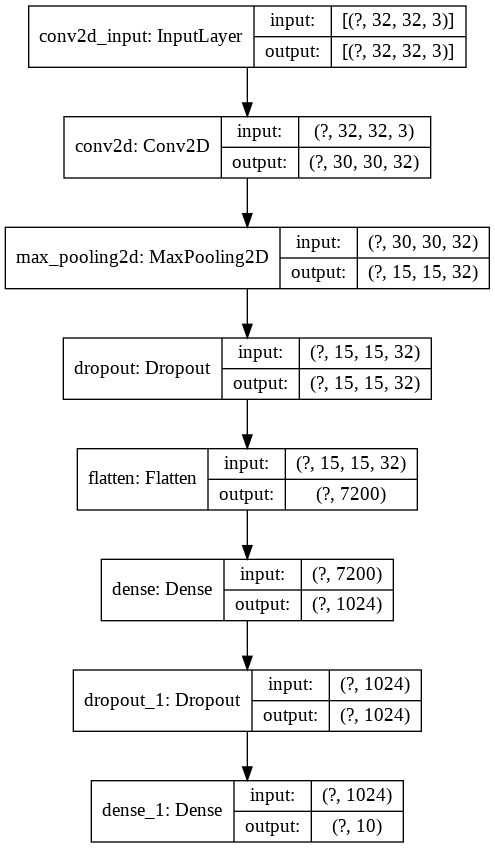

In [7]:
keras.utils.plot_model(model,show_shapes=True)

airplane


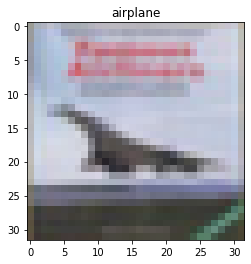

In [8]:
plt.imshow(x_test[3]) 
plt.title(class_names[y_test[3:4][0][0]])
print(class_names[np.argmax(predictions[3])])

In [9]:
#I'm defining a function that plot my predicted image, with true #label as title 
def plot_pred(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i:i+1],img[i]
    plt.grid(False)
    plt.title(class_names[true_label[0][0]])
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
 
#I'm defining a function that plot my prediction vector, showing #whether my
#predicted value is correct (in blue) or incorrect (in red)

def plot_bar(i,predictions_array,true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.yticks([])
    plt.xticks(np.arange(10),class_names,rotation=40)
    
    thisplot=plt.bar(range(10),predictions_array, color='grey')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    
    
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    
    thisplot[predicted_label].set_color(color)



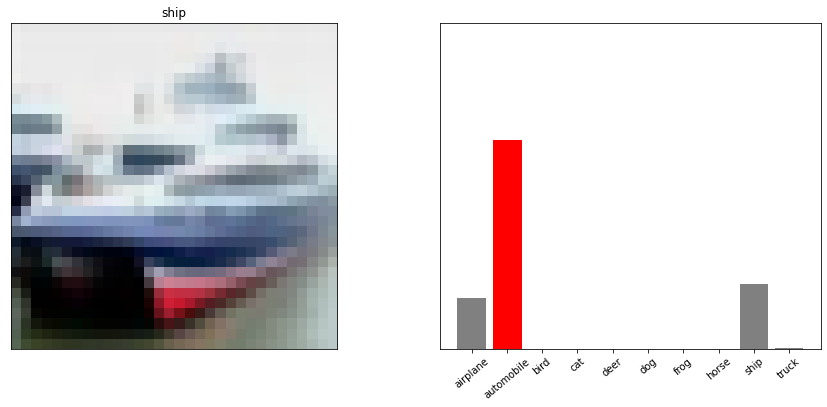

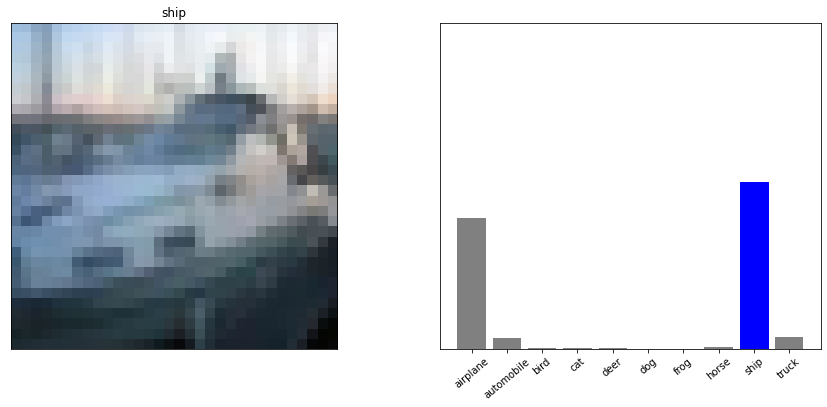

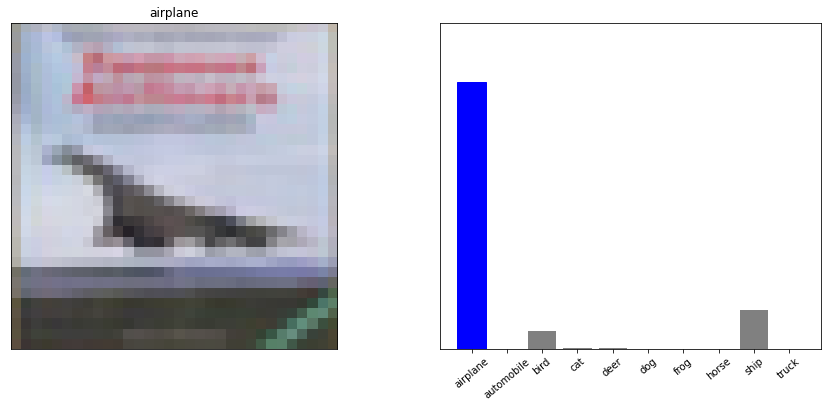

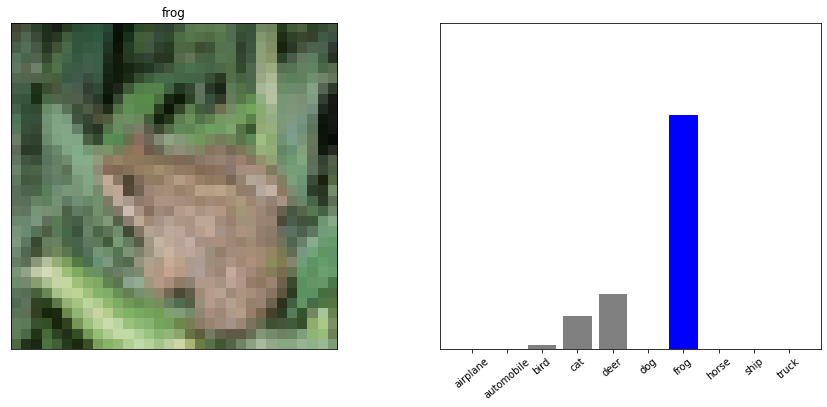

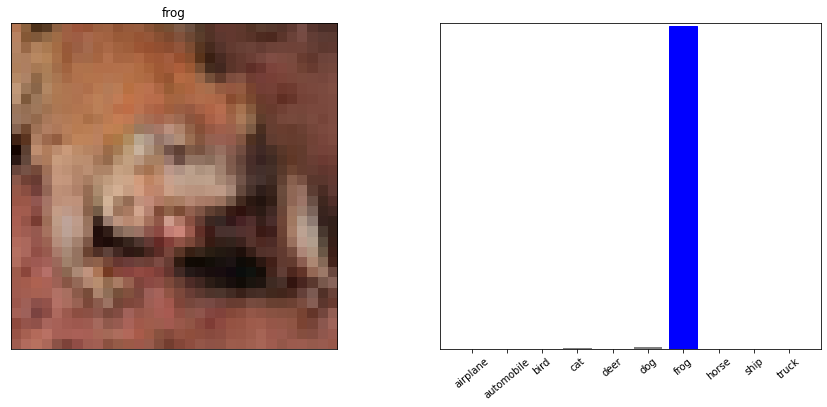

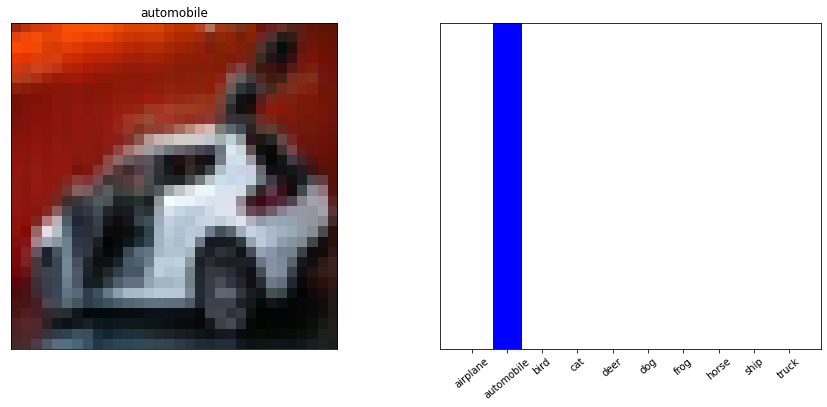

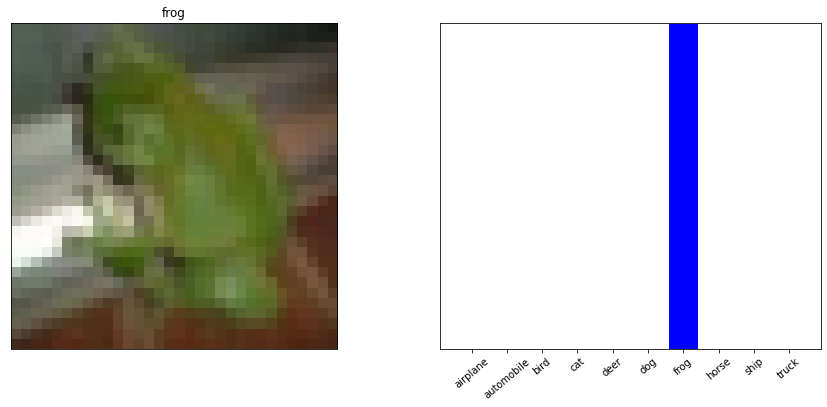

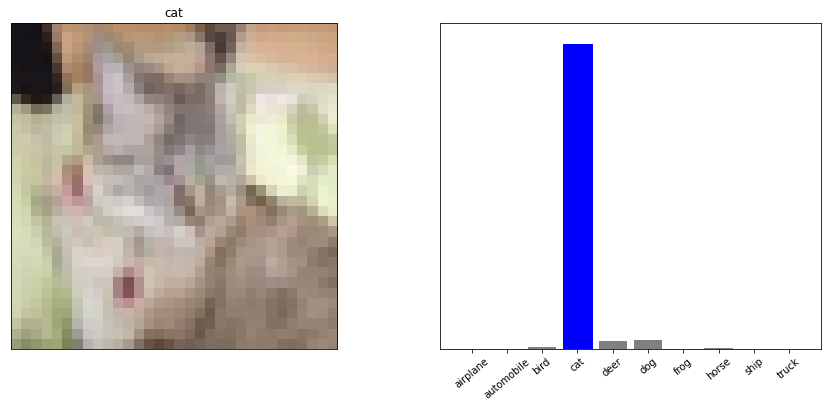

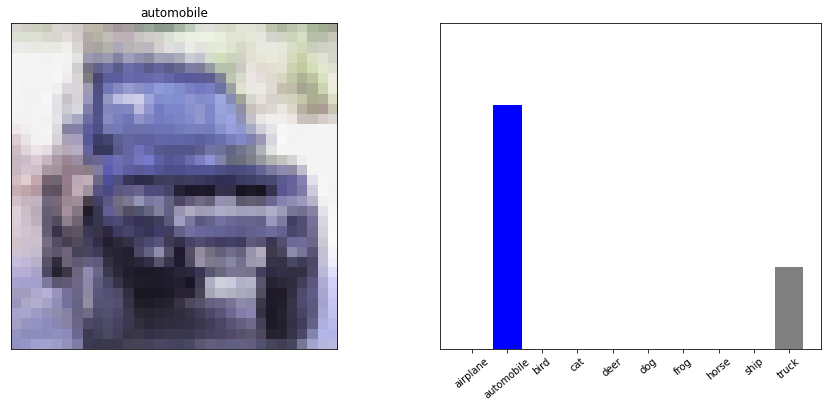

In [10]:
#plotting both the images

for i in range(1,10):
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  plot_pred(i, predictions, y_test, x_test)
  plt.subplot(1,2,2)
  plot_bar(i, predictions,  y_test)
  plt.show()


[Transfer Learning](https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a)

[Convolutional NN](https://towardsdatascience.com/a-simple-guide-to-convolutional-neural-networks-751789e7bd88)

[Dropout](https://towardsdatascience.com/12-main-dropout-methods-mathematical-and-visual-explanation-58cdc2112293)

